This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


In [2]:
train_images.shape

(60000, 784)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 6ms/step - loss: 0.6149 - accuracy: 0.8146 - val_loss: 0.2554 - val_accuracy: 0.9241
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2521 - accuracy: 0.9221 - val_loss: 0.2349 - val_accuracy: 0.9252
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1624 - accuracy: 0.9499 - val_loss: 0.1782 - val_accuracy: 0.9423
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1124 - accuracy: 0.9657 - val_loss: 0.1618 - val_accuracy: 0.9513
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0834 - accuracy: 0.9741 - val_loss: 0.1277 - val_accuracy: 0.9637
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0615 - accuracy: 0.9803 - val_loss: 0.1318 - val_accuracy: 0.9619
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0456 - accuracy: 0.9847 - val_loss: 0.1318 - val_accuracy: 0.9632
Epoch 

**Plotting a validation accuracy comparison**

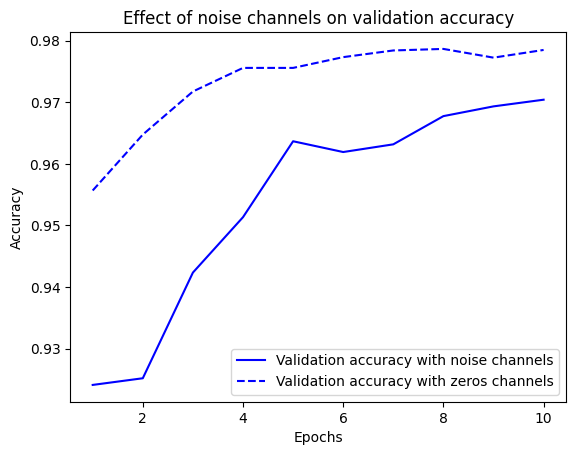

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [5]:
# randomly shuffled data이므로 무의미한 데이터임. val_accuracy에 변화가 크게 생기지 않고 있음을 발견할 수 있음
# 하지만 accuracy 자체는 꾸준히 증가하고 있음. 같은 데이터로 반복 훈련을 하고 있기에 training accuracy는 증가하는 것
# 무의미한 데이터도 딥러닝은 할 수 있으나, 데이터가 바뀌면 무의미해짐. 즉, 이 경우에는 val_accuracy가 더 정확하며, training accuracy를 신뢰할 수 없음.
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3169 - accuracy: 0.0982 - val_loss: 2.3059 - val_accuracy: 0.1073
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1168 - val_loss: 2.3088 - val_accuracy: 0.1040
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2919 - accuracy: 0.1239 - val_loss: 2.3143 - val_accuracy: 0.1015
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2797 - accuracy: 0.1370 - val_loss: 2.3230 - val_accuracy: 0.1053
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2642 - accuracy: 0.1492 - val_loss: 2.3365 - val_accuracy: 0.1067
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2451 - accuracy: 0.1656 - val_loss: 2.3472 - val_accuracy: 0.1056
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2225 - accuracy: 0.1806 - val_loss: 2.3540 - val_accuracy: 0.1068

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [6]:
# training accuracy와 val_accuracy 모두 상승하지 않음
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 673.9000 - accuracy: 0.3274 - val_loss: 4.4456 - val_accuracy: 0.2381
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.1449 - accuracy: 0.2190 - val_loss: 2.2036 - val_accuracy: 0.2137
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7468 - accuracy: 0.2179 - val_loss: 2.2876 - val_accuracy: 0.1915
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4376 - accuracy: 0.2145 - val_loss: 2.1014 - val_accuracy: 0.2247
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4729 - accuracy: 0.2067 - val_loss: 2.5181 - val_accuracy: 0.2329
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 2.7212 - accuracy: 0.2234 - val_loss: 2.2206 - val_accuracy: 0.2060
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3559 - accuracy: 0.2220 - val_loss: 2.1179 - val_accuracy: 0.2593
Epoc

**The same model with a more appropriate learning rate**

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3454 - accuracy: 0.9126 - val_loss: 0.1406 - val_accuracy: 0.9584
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1248 - accuracy: 0.9647 - val_loss: 0.1269 - val_accuracy: 0.9662
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0969 - accuracy: 0.9739 - val_loss: 0.1861 - val_accuracy: 0.9604
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0869 - accuracy: 0.9775 - val_loss: 0.1883 - val_accuracy: 0.9644
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0716 - accuracy: 0.9821 - val_loss: 0.1731 - val_accuracy: 0.9712
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0657 - accuracy: 0.9838 - val_loss: 0.2235 - val_accuracy: 0.9647
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0579 - accuracy: 0.9869 - val_loss: 0.1951 - val_accuracy: 0.9729
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [8]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6687 - accuracy: 0.8357 - val_loss: 0.3638 - val_accuracy: 0.9013
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3546 - accuracy: 0.9022 - val_loss: 0.3122 - val_accuracy: 0.9138
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3189 - accuracy: 0.9116 - val_loss: 0.2938 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3031 - accuracy: 0.9160 - val_loss: 0.2844 - val_accuracy: 0.9199
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2930 - accuracy: 0.9176 - val_loss: 0.2790 - val_accuracy: 0.9234
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2865 - accuracy: 0.9198 - val_loss: 0.2758 - val_accuracy: 0.9241
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2815 - accuracy: 0.9209 - val_loss: 0.2714 - val_accuracy: 0.9259
Epoch 

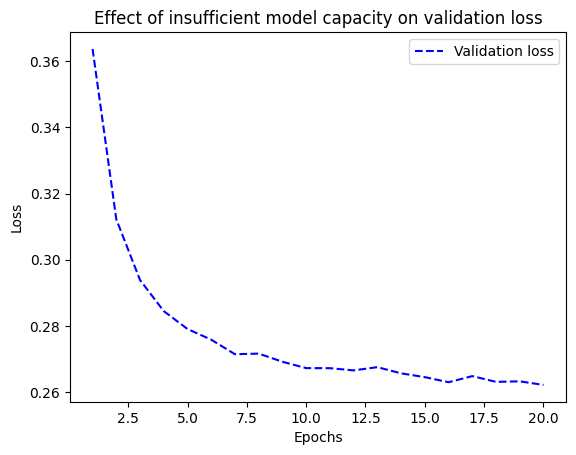

In [9]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [10]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3673 - accuracy: 0.8959 - val_loss: 0.1806 - val_accuracy: 0.9491
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1617 - accuracy: 0.9518 - val_loss: 0.1403 - val_accuracy: 0.9586
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1128 - accuracy: 0.9664 - val_loss: 0.1113 - val_accuracy: 0.9666
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0863 - accuracy: 0.9737 - val_loss: 0.0994 - val_accuracy: 0.9703
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0684 - accuracy: 0.9791 - val_loss: 0.1028 - val_accuracy: 0.9698
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0557 - accuracy: 0.9836 - val_loss: 0.0927 - val_accuracy: 0.9716
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0894 - val_accuracy: 0.9735
Epoch 

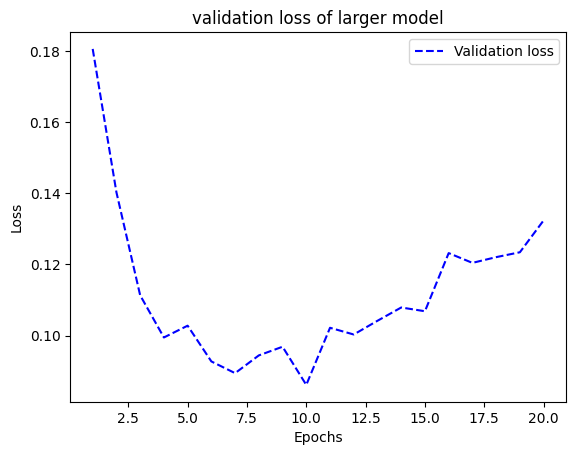

In [20]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("validation loss of larger model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 72ms/step - loss: 0.5472 - accuracy: 0.7655 - val_loss: 0.4123 - val_accuracy: 0.8570
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3330 - accuracy: 0.8888 - val_loss: 0.3130 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2444 - accuracy: 0.9184 - val_loss: 0.3065 - val_accuracy: 0.8742
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1940 - accuracy: 0.9359 - val_loss: 0.2930 - val_accuracy: 0.8802
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1673 - accuracy: 0.9456 - val_loss: 0.2812 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1411 - accuracy: 0.9541 - val_loss: 0.2851 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1190 - accurac

**Version of the model with lower capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.6605 - accuracy: 0.5565 - val_loss: 0.6189 - val_accuracy: 0.6657
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5831 - accuracy: 0.7621 - val_loss: 0.5512 - val_accuracy: 0.7797
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5013 - accuracy: 0.8678 - val_loss: 0.4778 - val_accuracy: 0.8520
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4250 - accuracy: 0.8962 - val_loss: 0.4163 - val_accuracy: 0.8772
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3632 - accuracy: 0.9083 - val_loss: 0.3743 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3147 - accuracy: 0.9156 - val_loss: 0.3380 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2763 - accuracy: 0.9213 - val_loss: 0.3156 - val_accuracy: 0.8860
Epoch 8/20
30

**Version of the model with higher capacity**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 78ms/step - loss: 0.5739 - accuracy: 0.7205 - val_loss: 0.3910 - val_accuracy: 0.8354
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3178 - accuracy: 0.8695 - val_loss: 0.3976 - val_accuracy: 0.8259
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2465 - accuracy: 0.9026 - val_loss: 0.2666 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1788 - accuracy: 0.9303 - val_loss: 0.2817 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1347 - accuracy: 0.9476 - val_loss: 0.3187 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1070 - accuracy: 0.9652 - val_loss: 0.3522 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0834 - accuracy: 0.9750 - val_loss: 0.3622 - val_accuracy: 0.8816
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [16]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.6592 - accuracy: 0.7547 - val_loss: 0.5318 - val_accuracy: 0.8645
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4574 - accuracy: 0.8838 - val_loss: 0.4205 - val_accuracy: 0.8784
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3660 - accuracy: 0.9055 - val_loss: 0.3863 - val_accuracy: 0.8788
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3123 - accuracy: 0.9199 - val_loss: 0.3644 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2834 - accuracy: 0.9269 - val_loss: 0.3915 - val_accuracy: 0.8684
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2656 - accuracy: 0.9364 - val_loss: 0.3518 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2552 - accuracy: 0.9399 - val_loss: 0.3580 - val_accuracy: 0.8851
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [17]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 67ms/step - loss: 0.6483 - accuracy: 0.6113 - val_loss: 0.5588 - val_accuracy: 0.8298
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5410 - accuracy: 0.7453 - val_loss: 0.4565 - val_accuracy: 0.8572
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4536 - accuracy: 0.8099 - val_loss: 0.3602 - val_accuracy: 0.8772
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3892 - accuracy: 0.8481 - val_loss: 0.3183 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3408 - accuracy: 0.8703 - val_loss: 0.2912 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2967 - accuracy: 0.8958 - val_loss: 0.2813 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2622 - accuracy: 0.9076 - val_loss: 0.2795 - val_accuracy: 0.8886
Epoch 8/20
30

## Summary